In [1]:
from clustering.preprocess import Preprocess
from clustering.kmeans import KMeansClustering
from clustering.lda import LDA
import logging
logging.getLogger().setLevel(logging.INFO)

In [2]:
data_dev = Preprocess.open_csv("F:\Thesis\data\SemEval\hateval2019_en_dev.csv")
data_train = Preprocess.open_csv("F:\Thesis\data\SemEval\hateval2019_en_train.csv")
HS = '1'
TR = '1'
AG = '1'
filtered_dev = Preprocess.filter_sem_eval(X=data_dev, HS=HS, TR=TR, AG=AG)
filtered_train = Preprocess.filter_sem_eval(X=data_train, HS=HS, TR=TR, AG=AG)
filtered_data = filtered_dev + filtered_train
tweets = [x[1] for x in filtered_data]
cleaned_data = Preprocess.clean(X=tweets)
km = KMeansClustering()
X = km.fit_tfidf(cleaned_data)
X = km.fit_lsa(X)

INFO:root:Original data length: 1000
INFO:root:After applying filters: 109
INFO:root:Data length after removing invalid tweets: 48
INFO:root:Original data length: 9000
INFO:root:After applying filters: 461
INFO:root:Data length after removing invalid tweets: 160
INFO:root:Explained variance of the SVD step: 68%


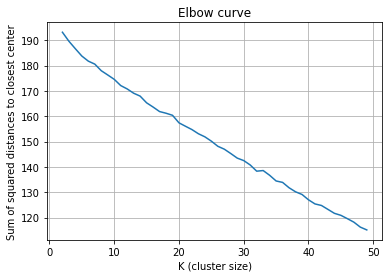

In [3]:
%matplotlib inline
km.plot_elbow_curve(max_k=50, X=X)

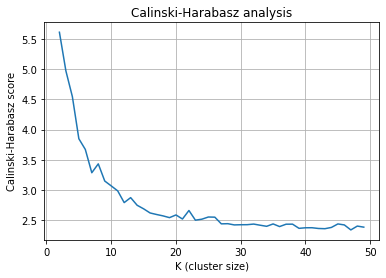

In [4]:
%matplotlib inline
# Higher values are better, when clusters are dense and well separated
km.plot_calinski_harabasz_analysis(max_k=50, X=X)

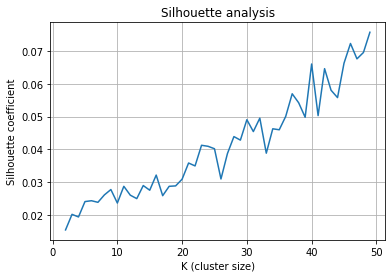

In [5]:
%matplotlib inline
# Higher values are better
km.plot_silhouette_analysis(max_k=50, X=X)

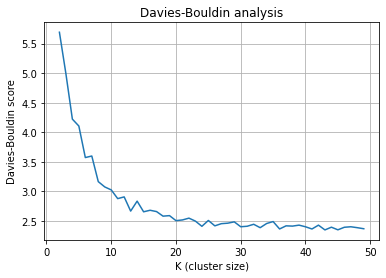

In [6]:
%matplotlib inline
# Values close to zero indicate a better partition
km.plot_davies_bouldin_score_analysis(max_k=50, X=X)

In [7]:
K = 5
km.cluster(X= X, K=K)
km.print_top_terms()

Cluster 0:
 stfu pussy bitch hoe ass dont im feel know youre

Cluster 1:
 fucking cunt shit bitch whore piece stop stupid look aint

Cluster 2:
 fuck shut bitch dont fucking like pussy slut hoe youre

Cluster 3:
 ass bitch stupid ur beat control hit fat lil wanna

Cluster 4:
 bitch like just skank whore rape stop dick want im



In [8]:
NUM_SAMPLES=10
km.cluster(X= X, K=K)
km.print_most_representative_samples(original_data=filtered_data, X=X, num_samples=NUM_SAMPLES)

Cluster 0: most representative sample indices: [ 40 199 161 196 189  42  55 198  34 137]
['19077', 'Bitch shut the fuck up', '1', '1', '1']

['9068', 'Shut the fuck up pls', '1', '1', '1', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']

['6289', 'SHUT UP THE FUCK YOU SLUT!', '1', '1', '1', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']

['8983', 'Bitch shut the fuck up and dont talk about Afghanistan', '1', '1', '1', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']

['8881', 'PSAYoure a slut but you dont fuck meBecause you sound like a cry baby bitch shut the fuck up already', '1', '1', '1', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']

['19103', 'shut the fuck up you know youre that bitch, whore', '1', '1', '1']

['4708', 'You are a fucking ugly bitch!shut the fuck up??????????????????????????????????????????????????????you just a ugly bitch!fuck you ??????????', '1', '1', '1', '', '', '', '', '', '', 

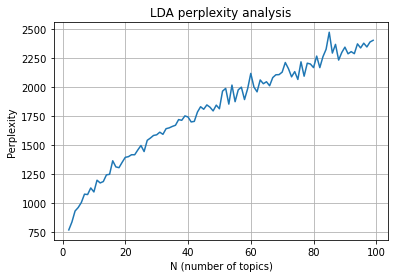

In [9]:
lda = LDA()
X = lda.fit_tf(X=cleaned_data)
pred = lda.fit_lda(X=X, n_components=NUM_SAMPLES)
# Lower values are better
# Perplexity indicates how well the probability model predicts the samples
lda.plot_perplexity(max_n=100, X=X)